#Who will quitting next?

So, after analyzing why people quiting we will find out who will leave next.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


df = pd.read_csv('https://raw.githubusercontent.com/bhaskoro-muthohar/DataScienceLearning/master/HR_comma_sep.csv')

##Model Generation

###Preparing the data for Model Generation

In [0]:
def process_df_for_ml(df):
    """
    Process a dataframe for model training/prediction use.

    Returns X/y tensors.
    """

    df = df.copy()
    # Map salary to 0,1,2
    df.salary = df.salary.map({"low": 0, "medium": 1, "high": 2})
    # dropping left and sales X for the df, y for the left
    X = df.drop(["left", "sales"], axis=1)
    y = df["left"]
    return (X, y)

###Training the model

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = process_df_for_ml(df)

#splitting the train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0, stratify=y)

In [4]:
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))

print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(11249, 8)
y_train shape:(11249,)
X_test shape:(3750, 8)
y_test shape:(3750,)


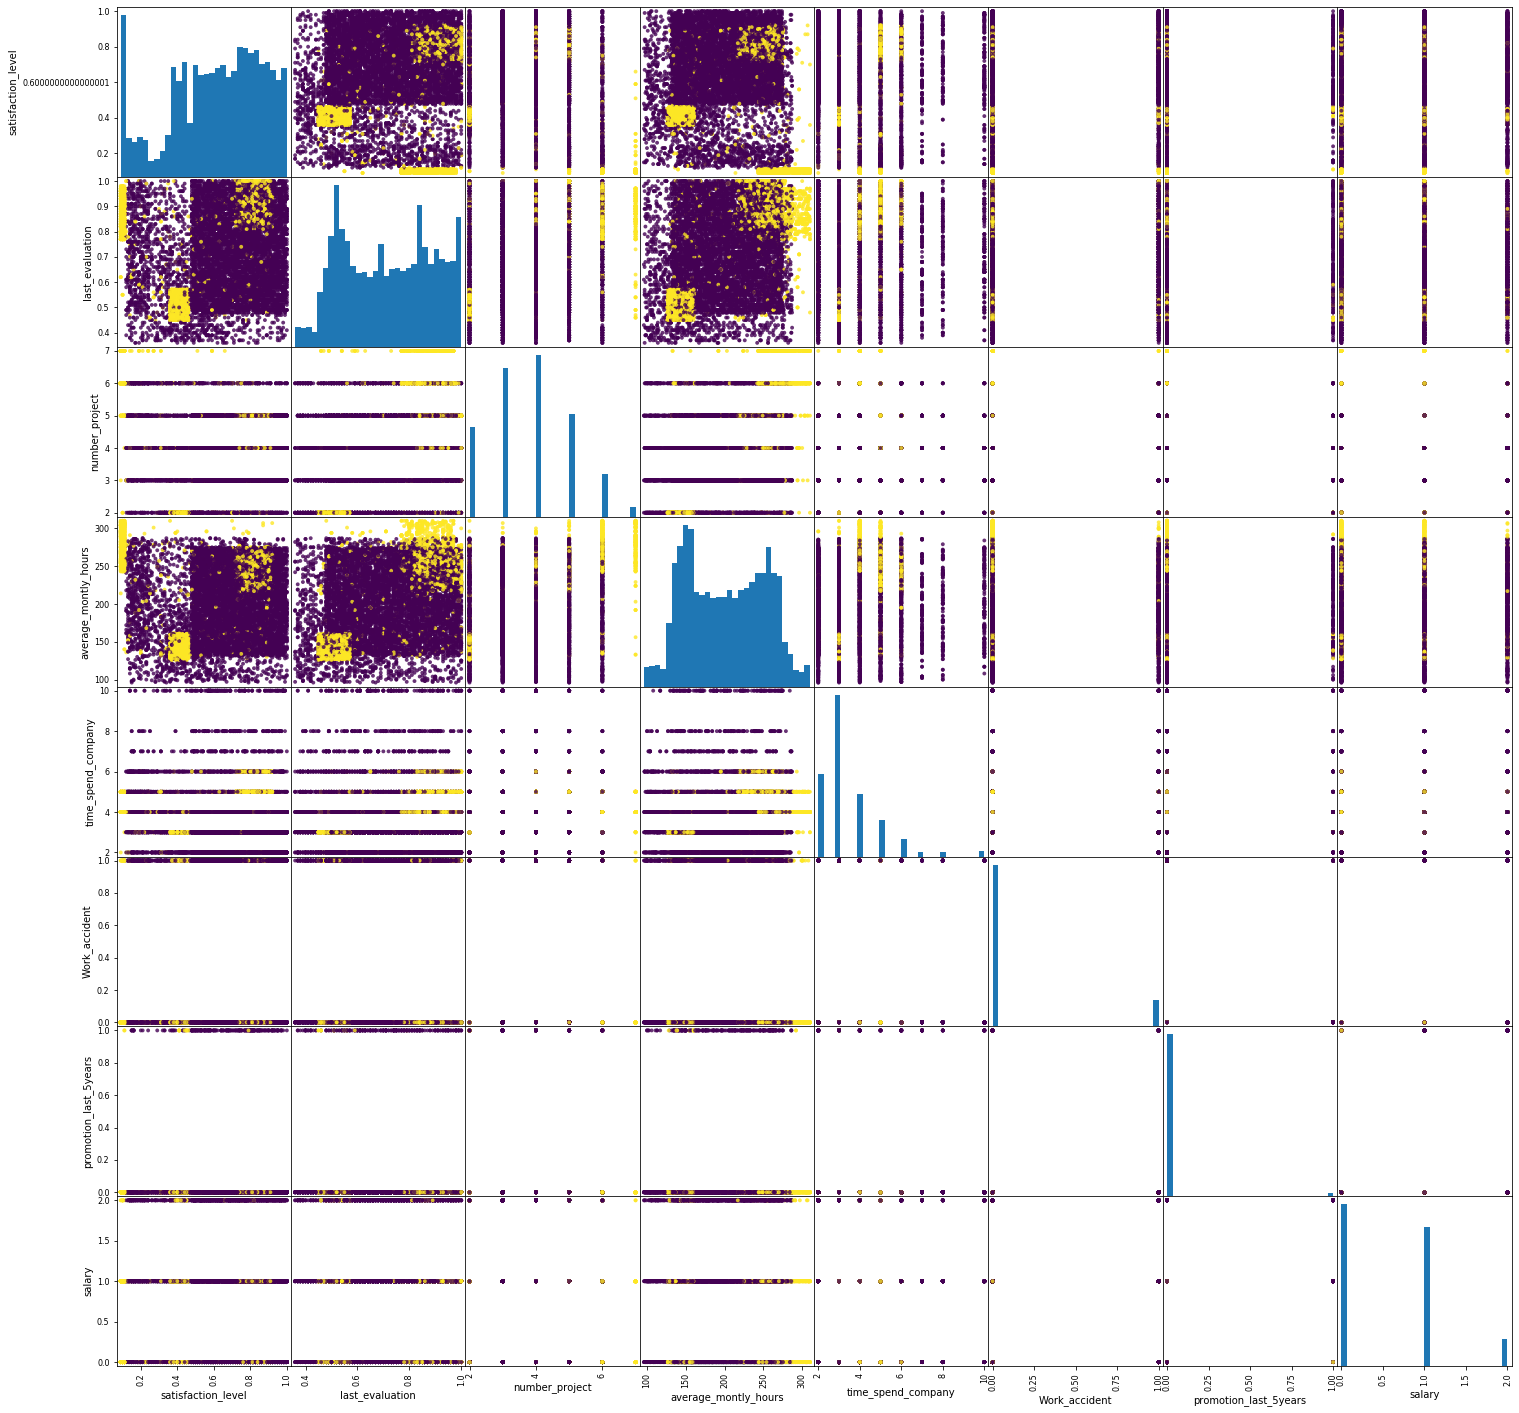

In [5]:
from pandas.plotting import scatter_matrix

X_train_df = pd.DataFrame(X_train)

grr = scatter_matrix(X_train_df, c=y_train, figsize=(25,25), marker='.', hist_kwds={'bins':30},
                     s=60, alpha=.8)

Imho, based on scatter plot the best classification methods will be Decision Tree, Random Forest, and SVC and maybe KN Classifier too. I will use Decision Tree algorithm this time because the others I have not learned yet.

In [7]:
from sklearn import tree
# Train a decision tree.
X, y = process_df_for_ml(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

###Viz the decision tree

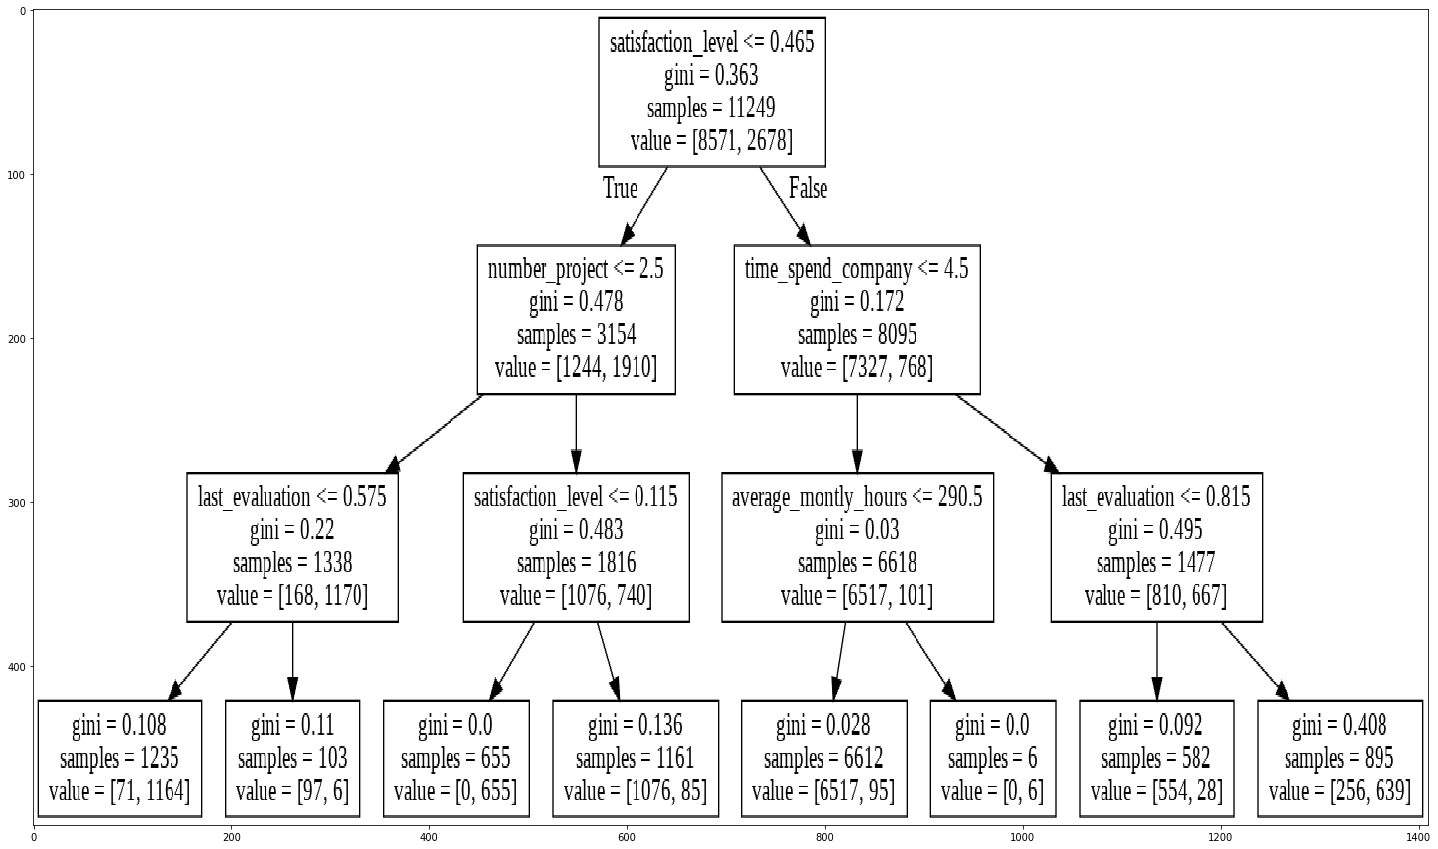

In [12]:
# Visualizing the decision tree

from scipy import misc
import scipy.misc
import imageio
import pydotplus
import graphviz

def show_tree(decisionTree, file_path):
    tree.export_graphviz(decisionTree, out_file='tree.dot',feature_names=X_train.columns)
    graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')
    i = imageio.imread(file_path)
    
    fig, ax = plt.subplots(figsize=(25, 15))    
    ax.imshow(i, aspect='auto')

# To use it
show_tree(clftree, 'tree.png')

###Evaluating the model

In [13]:
y_pred = clftree.predict(X_test)
print("Test set prediction:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(clftree.score(X_test, y_test)))

Test set prediction:
 [0 0 0 ... 0 0 1]
Test set score: 0.96


###Making prediction

Now we will predict the people who will leave next.

In [0]:
# Test the decision tree on people who haven't left yet.
notleftdf = df[df["left"] == 0].copy()
X, y = process_df_for_ml(notleftdf)

In [0]:
# Plug in a new column with ones and zeroes from the prediction.
notleftdf["will_leave"] = clftree.predict(X)

In [16]:
# Print those with the will-leave flag on.
print(notleftdf[notleftdf["will_leave"] == 1])

       satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years        sales  salary  will_leave
2011   0.34                0.39             2               136                   3                   0              0     0                      sales        medium  1         
2012   0.48                0.94             5               255                   6                   0              0     0                      accounting   medium  1         
2018   0.89                0.92             4               165                   5                   0              0     0                      hr           medium  1         
2306   0.80                0.98             2               232                   6                   1              0     0                      sales        low     1         
2415   0.92                0.97             4               238                   5                   1       

There are 424 potential employees predicted will leave the company.